# Customer Behavior Analysis 

### Import Some Importance Libraries 

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset 

In [94]:
customer_data=pd.read_csv("ecommerce_customer_data_large.csv")
customer_data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


### Data Cleaning  

In [95]:
customer_data=customer_data.sort_values(by='Customer ID')
customer_data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
160923,1,2020-03-04 10:26:02,Clothing,205,5,385,Cash,67,NaN,Dominic Cline,67,Female,0
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,NaN,Dominic Cline,67,Female,0
160921,1,2021-04-08 18:33:34,Books,456,5,5148,Credit Card,67,0.0,Dominic Cline,67,Female,0
225932,2,2020-07-31 16:27:41,Electronics,408,2,4777,PayPal,42,0.0,Crystal Day,42,Female,0
225937,2,2023-04-26 10:10:00,Electronics,461,5,604,Cash,42,0.0,Crystal Day,42,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23863,50000,2022-11-12 02:08:17,Books,231,5,2695,Credit Card,29,0.0,Kenneth Lawrence,29,Female,0
23862,50000,2020-10-04 15:54:19,Clothing,107,3,2509,PayPal,29,1.0,Kenneth Lawrence,29,Female,0
23861,50000,2020-08-22 23:38:34,Clothing,148,3,2887,Cash,29,0.0,Kenneth Lawrence,29,Female,0
23866,50000,2020-03-11 22:10:45,Clothing,308,1,3854,Cash,29,1.0,Kenneth Lawrence,29,Female,0


In [96]:
customer_data.isnull().sum() # check the missing values

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [97]:
customer_data['Returns']=customer_data['Returns'].fillna(customer_data['Returns'].mean())

In [98]:
customer_data['Returns']=customer_data['Returns'].astype(int)

In [99]:
customer_data.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [100]:
customer_data.dtypes

Customer ID               int64
Purchase Date            object
Product Category         object
Product Price             int64
Quantity                  int64
Total Purchase Amount     int64
Payment Method           object
Customer Age              int64
Returns                   int32
Customer Name            object
Age                       int64
Gender                   object
Churn                     int64
dtype: object

In [101]:
customer_data['Purchase Date']=pd.to_datetime(customer_data['Purchase Date'])
customer_data


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
160923,1,2020-03-04 10:26:02,Clothing,205,5,385,Cash,67,0,Dominic Cline,67,Female,0
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,0,Dominic Cline,67,Female,0
160921,1,2021-04-08 18:33:34,Books,456,5,5148,Credit Card,67,0,Dominic Cline,67,Female,0
225932,2,2020-07-31 16:27:41,Electronics,408,2,4777,PayPal,42,0,Crystal Day,42,Female,0
225937,2,2023-04-26 10:10:00,Electronics,461,5,604,Cash,42,0,Crystal Day,42,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23863,50000,2022-11-12 02:08:17,Books,231,5,2695,Credit Card,29,0,Kenneth Lawrence,29,Female,0
23862,50000,2020-10-04 15:54:19,Clothing,107,3,2509,PayPal,29,1,Kenneth Lawrence,29,Female,0
23861,50000,2020-08-22 23:38:34,Clothing,148,3,2887,Cash,29,0,Kenneth Lawrence,29,Female,0
23866,50000,2020-03-11 22:10:45,Clothing,308,1,3854,Cash,29,1,Kenneth Lawrence,29,Female,0


In [102]:
customer_data.dtypes

Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                           int32
Customer Name                    object
Age                               int64
Gender                           object
Churn                             int64
dtype: object

In [103]:
customer_data.drop_duplicates(inplace=True)
customer_data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
160923,1,2020-03-04 10:26:02,Clothing,205,5,385,Cash,67,0,Dominic Cline,67,Female,0
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,0,Dominic Cline,67,Female,0
160921,1,2021-04-08 18:33:34,Books,456,5,5148,Credit Card,67,0,Dominic Cline,67,Female,0
225932,2,2020-07-31 16:27:41,Electronics,408,2,4777,PayPal,42,0,Crystal Day,42,Female,0
225937,2,2023-04-26 10:10:00,Electronics,461,5,604,Cash,42,0,Crystal Day,42,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23863,50000,2022-11-12 02:08:17,Books,231,5,2695,Credit Card,29,0,Kenneth Lawrence,29,Female,0
23862,50000,2020-10-04 15:54:19,Clothing,107,3,2509,PayPal,29,1,Kenneth Lawrence,29,Female,0
23861,50000,2020-08-22 23:38:34,Clothing,148,3,2887,Cash,29,0,Kenneth Lawrence,29,Female,0
23866,50000,2020-03-11 22:10:45,Clothing,308,1,3854,Cash,29,1,Kenneth Lawrence,29,Female,0


# Exploratory Data Analysis

## Behavior Analysis:- Cohort Analysis

In [104]:
customer_data['Age_Group']=pd.cut(customer_data['Customer Age'], bins=[18,26,46,61,71], labels=['Youngs', 'Adults', 'Middle_Aged','Elderly'],include_lowest=True)
customer_data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Age_Group
160923,1,2020-03-04 10:26:02,Clothing,205,5,385,Cash,67,0,Dominic Cline,67,Female,0,Elderly
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,0,Dominic Cline,67,Female,0,Elderly
160921,1,2021-04-08 18:33:34,Books,456,5,5148,Credit Card,67,0,Dominic Cline,67,Female,0,Elderly
225932,2,2020-07-31 16:27:41,Electronics,408,2,4777,PayPal,42,0,Crystal Day,42,Female,0,Adults
225937,2,2023-04-26 10:10:00,Electronics,461,5,604,Cash,42,0,Crystal Day,42,Female,0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23863,50000,2022-11-12 02:08:17,Books,231,5,2695,Credit Card,29,0,Kenneth Lawrence,29,Female,0,Adults
23862,50000,2020-10-04 15:54:19,Clothing,107,3,2509,PayPal,29,1,Kenneth Lawrence,29,Female,0,Adults
23861,50000,2020-08-22 23:38:34,Clothing,148,3,2887,Cash,29,0,Kenneth Lawrence,29,Female,0,Adults
23866,50000,2020-03-11 22:10:45,Clothing,308,1,3854,Cash,29,1,Kenneth Lawrence,29,Female,0,Adults


### Age Group by Product Category

In [105]:
grouped_customer_data=customer_data.groupby(['Product Category','Age_Group']).size().reset_index(name='count')
grouped_customer_data

,Product Category,Age_Group,count
0,Books,Youngs,10903
1,Books,Adults,23317
2,Books,Middle_Aged,17275
3,Books,Elderly,10752
4,Clothing,Youngs,10934
5,Clothing,Adults,23885
6,Clothing,Middle_Aged,17322
7,Clothing,Elderly,10440
8,Electronics,Youngs,11005
9,Electronics,Adults,23537


### Distribution of Total Purchase Amount across Product Categories

In [106]:
Sales_product=customer_data.groupby('Product Category')['Total Purchase Amount'].sum().reset_index()
Sales_product

,Product Category,Total Purchase Amount
0,Books,169345236
1,Clothing,170716122
2,Electronics,170146025
3,Home,171138916


### Comparison of Total Purchase Amount by Gender

In [107]:
Sales_gender=customer_data.groupby('Gender')['Total Purchase Amount'].sum().reset_index()
Sales_gender

,Gender,Total Purchase Amount
0,Female,338559456
1,Male,342786843


### Total Purchase Amount by Age-Group

In [108]:
Sales_age_group=customer_data.groupby('Age_Group')['Total Purchase Amount'].sum().reset_index()
Sales_age_group

,Age_Group,Total Purchase Amount
0,Youngs,114513829
1,Adults,253241601
2,Middle_Aged,193363001
3,Elderly,120227868


### Distribution of Total Purchase Amount by Payment Method

In [109]:
Sales_payment_method=customer_data.groupby('Payment Method')['Total Purchase Amount'].sum().reset_index()
Sales_payment_method

,Payment Method,Total Purchase Amount
0,Cash,225423854
1,Credit Card,228822915
2,PayPal,227099530


In [110]:
return_customer_data=customer_data[customer_data['Returns']==1]
return_rate_customer_data=return_customer_data.groupby(['Product Category','Customer Age'])['Returns'].sum().reset_index()
return_rate_customer_data['return_rate']=return_rate_customer_data['Returns']/return_customer_data.shape[1]
return_rate_customer_data['return_rate'].sum()

7248.285714285714

### Product Category Sales by Age and Gender

In [111]:
pt=pd.pivot_table(customer_data,index=['Age_Group','Gender'],columns=['Product Category'],values='Total Purchase Amount', aggfunc=sum)
pt

Product Category       Books  Clothing  Electronics      Home
Age_Group   Gender                                           
Youngs      Female  14060374  14016099     13957133  14183247
            Male    14365199  14497627     14638060  14796090
Adults      Female  31620714  32014773     31770603  32012267
            Male    31145805  32041804     31172621  31463014
Middle_Aged Female  23026597  23806054     23925295  24100425
            Male    24598728  24709377     24493241  24703284
Elderly     Female  15277027  14863065     15072895  14852888
            Male    15250792  14767323     15116177  15027701

# Recency Frequency Monetary (RFM) Analysis 

In [112]:
customer_data['Recency']=(pd.to_datetime('today')-pd.to_datetime(customer_data['Purchase Date'])).dt.days
customer_data.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Age_Group,Recency
160923,1,2020-03-04 10:26:02,Clothing,205,5,385,Cash,67,0,Dominic Cline,67,Female,0,Elderly,1708
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,0,Dominic Cline,67,Female,0,Elderly,709


In [113]:
customer_data['Frequency']=customer_data.groupby('Customer ID')['Purchase Date'].transform('count')
customer_data.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Age_Group,Recency,Frequency
160923,1,2020-03-04 10:26:02,Clothing,205,5,385,Cash,67,0,Dominic Cline,67,Female,0,Elderly,1708,3
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,0,Dominic Cline,67,Female,0,Elderly,709,3


In [114]:
customer_data['Monetary']=customer_data.groupby('Customer ID')['Total Purchase Amount'].transform('sum')
customer_data.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Age_Group,Recency,Frequency,Monetary
160923,1,2020-03-04 10:26:02,Clothing,205,5,385,Cash,67,0,Dominic Cline,67,Female,0,Elderly,1708,3,6290
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,0,Dominic Cline,67,Female,0,Elderly,709,3,6290


In [115]:
customer_data['Recency_Score']=pd.qcut(customer_data['Recency'],q=5,labels=[1,2,3,4,5])

In [116]:
customer_data['Monetary_Score']=pd.qcut(customer_data['Frequency'],q=5,labels=[1,2,3,4,5])

In [117]:
customer_data['Frequency_Score']=pd.qcut(customer_data['Monetary'],q=5,labels=[1,2,3,4,5])

In [118]:
customer_data['RFM_Score']=customer_data['Recency_Score'].cat.codes+customer_data['Frequency_Score'].cat.codes+customer_data['Monetary_Score'].cat.codes
customer_data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,...,Gender,Churn,Age_Group,Recency,Frequency,Monetary,Recency_Score,Monetary_Score,Frequency_Score,RFM_Score
160923,1,2020-03-04 10:26:02,Clothing,205,5,385,Cash,67,0,Dominic Cline,...,Female,0,Elderly,1708,3,6290,5,1,1,4
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,0,Dominic Cline,...,Female,0,Elderly,709,3,6290,2,1,1,1
160921,1,2021-04-08 18:33:34,Books,456,5,5148,Credit Card,67,0,Dominic Cline,...,Female,0,Elderly,1308,3,6290,4,1,1,3
225932,2,2020-07-31 16:27:41,Electronics,408,2,4777,PayPal,42,0,Crystal Day,...,Female,0,Adults,1559,6,16481,5,3,3,8
225937,2,2023-04-26 10:10:00,Electronics,461,5,604,Cash,42,0,Crystal Day,...,Female,0,Adults,560,6,16481,1,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23863,50000,2022-11-12 02:08:17,Books,231,5,2695,Credit Card,29,0,Kenneth Lawrence,...,Female,0,Adults,726,7,21927,2,4,4,7
23862,50000,2020-10-04 15:54:19,Clothing,107,3,2509,PayPal,29,1,Kenneth Lawrence,...,Female,0,Adults,1494,7,21927,4,4,4,9
23861,50000,2020-08-22 23:38:34,Clothing,148,3,2887,Cash,29,0,Kenneth Lawrence,...,Female,0,Adults,1537,7,21927,5,4,4,10
23866,50000,2020-03-11 22:10:45,Clothing,308,1,3854,Cash,29,1,Kenneth Lawrence,...,Female,0,Adults,1701,7,21927,5,4,4,10


In [119]:
customer_data['Segment']=pd.qcut(customer_data['RFM_Score'],q=4, labels=['Low','Medium','High','Very_High'])

### Total Purchase Amount by customer segment 

In [120]:
customer_segment_purchase=customer_data.groupby('Segment')['Total Purchase Amount'].sum().reset_index()
customer_segment_purchase

,Segment,Total Purchase Amount
0,Low,161314620
1,Medium,216074205
2,High,148916342
3,Very_High,155041132


### Product Category Preferences by Segment

In [121]:
rfm_product_sales=customer_data.groupby(['Segment','Product Category'])['Total Purchase Amount'].sum().reset_index()
rfm_product_sales

,Segment,Product Category,Total Purchase Amount
0,Low,Books,40477555
1,Low,Clothing,40248958
2,Low,Electronics,39685120
3,Low,Home,40902987
4,Medium,Books,53388033
5,Medium,Clothing,54486407
6,Medium,Electronics,53910413
7,Medium,Home,54289352
8,High,Books,36779937
9,High,Clothing,37124058


### Age-Group Spending Patterns by Segment

In [122]:
rfm_age_group=customer_data.groupby(['Segment','Age_Group'])['Total Purchase Amount'].mean().reset_index()
rfm_age_group

,Segment,Age_Group,Total Purchase Amount
0,Low,Youngs,2434.349944
1,Low,Adults,2509.732027
2,Low,Middle_Aged,2595.594840
3,Low,Elderly,2675.826946
4,Medium,Youngs,2576.435594
5,Medium,Adults,2657.968269
6,Medium,Middle_Aged,2755.887806
7,Medium,Elderly,2805.088513
8,High,Youngs,2715.290899
9,High,Adults,2787.232569


### Payment Method Purchase Patterns by CUstomer Segment

In [123]:
rfm_payment_method=customer_data.groupby(['Segment','Payment Method'])['Total Purchase Amount'].sum().reset_index()
rfm_payment_method

,Segment,Payment Method,Total Purchase Amount
0,Low,Cash,53643798
1,Low,Credit Card,53955463
2,Low,PayPal,53715359
3,Medium,Cash,71355786
4,Medium,Credit Card,72888389
5,Medium,PayPal,71830030
6,High,Cash,49057121
7,High,Credit Card,50084707
8,High,PayPal,49774514
9,Very_High,Cash,51367149


In [124]:
pivot_customer_data=pd.pivot_table(customer_data, index='Age_Group',columns='Frequency', values='Monetary',aggfunc='mean')
pivot_customer_data

Frequency,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Age_Group,,,,,,,,,,,,,,,,,
Youngs,2567.404531,5257.314367,7808.492993,10492.486434,13011.400898,15709.291570,18272.860192,20857.635185,23272.517460,25435.741935,29258.876712,30914.093023,34975.142857,38382.666667,NaN,NaN,NaN
Adults,2661.988506,5402.117228,8063.054476,10775.035973,13446.055604,16127.431827,18804.441978,21298.773956,24224.558480,26477.652695,29984.569231,32168.529412,34417.884615,38072.714286,40510.0,34303.5,50179.0
Middle_Aged,2779.749455,5475.901127,8304.931452,11179.703301,13929.452683,16670.020429,19576.963347,22287.527253,24870.174000,27653.378906,30610.045872,34081.690909,36622.214286,37254.571429,44776.2,NaN,NaN
Elderly,3069.500000,5824.852825,8433.264244,11388.770604,14252.874579,17057.403315,19697.377528,22733.746124,25205.172757,28609.810345,31542.808824,34649.555556,38695.600000,44192.666667,48369.5,NaN,NaN


##  Customers Segment 

In [125]:
loyal_customers_threshold=np.percentile(customer_data['RFM_Score'],80) # top 20%
mid_value_customers_threshold=np.percentile(customer_data['RFM_Score'],50) # 50% customers


In [126]:
customer_data['Segment']= pd.cut(customer_data['RFM_Score'], bins=[customer_data['RFM_Score'].min(),mid_value_customers_threshold,loyal_customers_threshold,customer_data['RFM_Score'].max()], labels=['Casual Buyers','Regular Customers','Most Valuable Purchasers'], include_lowest=True)
print(f' Segment Percentages:')
print(customer_data['Segment'].value_counts(normalize=True)* 100)


 Segment Percentages:
Segment
Casual Buyers               57.4164
Regular Customers           29.7168
Most Valuable Purchasers    12.8668
Name: proportion, dtype: float64


In [127]:
print("\nSegment Statistics:")
print(customer_data.groupby('Segment')[['Recency','Frequency','Monetary']].mean())


Segment Statistics:
                              Recency  Frequency      Monetary
Segment                                                       
Casual Buyers              996.790415   4.625821  11998.916470
Regular Customers         1131.373890   7.378897  20656.316804
Most Valuable Purchasers  1456.828054   8.908757  25679.941493


# Visualization 

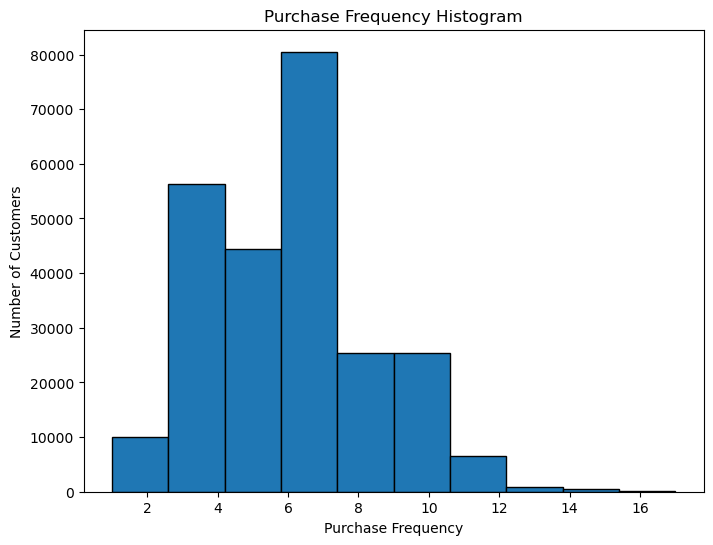

In [128]:
plt.figure(figsize=(8,6))
plt.hist(customer_data['Frequency'], bins=10, edgecolor='black')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.title('Purchase Frequency Histogram')
plt.show()

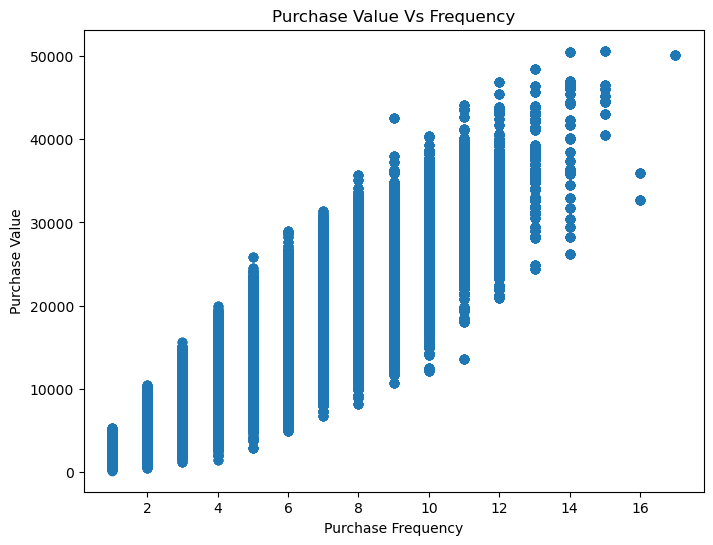

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(customer_data['Frequency'], customer_data['Monetary'])
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Value')
plt.title('Purchase Value Vs Frequency')
plt.show()

In [130]:
data= np.array([[996.67,1131.11,1456.68],[ 4.63,  7.38,8.91],[11998.27,20656.83, 25681.15]])

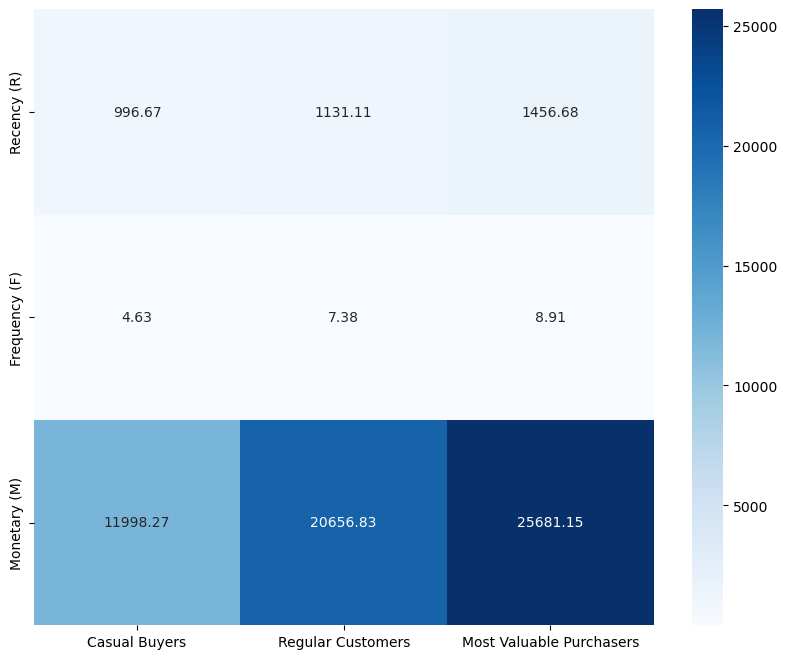

In [131]:
plt.figure(figsize=(10,8))
sns.heatmap(data, cmap='Blues',annot=True,fmt='.2f',xticklabels=['Casual Buyers','Regular Customers','Most Valuable Purchasers'],yticklabels=['Recency (R)','Frequency (F)','Monetary (M)'])
plt.show()

# Report

## Introduction
Customer Behavior analysis is the study of how consumers interact with products and services, from the point of initial awareness to the final decision-making process. It involves collecting and interpreting data,the objective is to understand purchasing patterns and customer preferences. By analyzing customer behavior, businesses gain insights into what drives customer decisions, helping them tailor marketing strategies, improve product offerings, and enhance the overall customer experience.

### Dataset Review
The dataset used in this analysis consist of 250000 records with 13 columns, including customer purchases, transaction dates, items purcahsed, payment method, and customer demographics. The data spans a three year period, from January 2020 to December 2023, providing a comprehensive view of customer behavior trends and patterns during this timeframe.

 ### Objectives
This analysis aims to understand purchasing patterns and customer preferences. 

## Data Cleaning
The Data Cleaning process commenced with sorting the dataset by customer ID to facilitate efficient data manipulation. Subsequently steps included:-
*  **Missing values detection:-**
<br>
47,382 missing values in the "Returns" column, which was filled by the mean imputation to ensure data accuracy.
<br>
* **Data type conversion:-**
<br>
The "Returns" column was converted to integer using the astype() function and the "Purchase Date" column to datetime format.
<br>
* **Duplicate check:-**
<br>
No duplicate records in the dataset. 
<br>
<br>
Through this data cleaning, the dataset was significantly improved, eliminating missing values,standardizing data type,
<br>
 and removing duplicates.This resulting to high quality dataset  suitable for the accurate customer behavior analysis.

#  Exploratory Data Analysis (EDA)

 ## Cohort Analysis
This cohort Analysis aims to cover significant insights into customer purchasing patterns, preferences, and spending habits.
<br>
### Key Findings
<br>

* **Age Group Analysis by Product Category**
<br>
Adults consistantly purchased more across categories(Books, Clothing, Electronics, and Home) compared to other age groups, 
<br>
with the elderly being the lowest purchasers.
* **Distribution of Total Purchase Amount by Product Category**
<br>
Home goods accounted for the highest value(171,138,916), followed by 'Clothing, Electronics, and Books. 
* **Gender-Based Analysis**
This revealed that male(342,786,843 ) spent more than the females (338,559,456).
** **Age Group by Total Purhase**
<br>
Adult spent the most (253,241,601) followed by middle-aged, young, and elderly customers. 
* **Payment Method Analysis**
<br>
Credit card transactions had the highest value (228,822,915), closely followed by pay pal (227,099,530),and cash (225,423,854). 

 ## Recency Frequency Monetary (RFM) Analysis
The RFM ( Recency, Frequency, Monetary) analysis examines customer purchasing patterns,
<br>
and providing insights into target marketing strategies.
### Key Findings

* **Monetary Analysis**
<br>
Medium-segment customers spending (216,054,439), leading across segments. 
<br>
Elderly customers dominated spending, while young customers spent the least.
<br>
* **Payment Method Preferences**
<br>
credit cards were the preferred payment method, while cash was the least preferred.
<br>
* **Product Category Preferences**
<br>
Home goods and clothing being top choices across segments, with varying preferences:
<br>
* **Medium Segment:** Home goods (34%), CLothing(27%)
* **Elderly:** Home goods (40%), Electronics (23%)
* **Young:** Clothing (42%), Books(25%)

 ## Customers Segment
The customer segmentation analysis revealed valuable insights into customer behavior patterns, enabling targeted marking strategies.
### Key Findings
* **Customer Segment Distribution**
<br>
Casual Buyers: 57.41% (majority)
<br>
Regular customers: 29.72% 
<br>
Most Valuable Purchasers: 12.86%
<br>
* **Segment Characteristics**
<br>
Casual Buyers: High recency, low frequency
<br>
Regular customers: Consistent purchasing behavior
<br>
Most Valuable Purchasers: Frequent purchases, high revenue
<br>
* **Monetary Value by Segment**
<br>
Most Valuable Purchasers: Highest revenue contribution
<br>
Regular customers: Moderate revenue contribution
<br>
Casual Buyers: Lowest revenue contribution

 # Conclusion
The analysis provide valuable insights into customer purchasing patterns and preferences. The studies reveals that:-
* Adult drive sales across categories, with varying purchasing behaviour by age group.
* Medium-segment customers are top spenders, with credit cards as preferred payment method.
* Casual buyers comparises 57.41% of customers while most valuable purchasers drive significant revenue.
* Home goods and clothing are top product categories.
* Monetary value increases with loyalty.

 # Recommendations
Based on the insights gained from this customer behavior analysis, I recommend the following:
* **Targeted Campaigns**: Design age-specific marketing campaigns to cater to adults, focusing on home goods and clothing categories.
* **Bundling and Cross-Selling**: Offer bundled deals and cross-selling opportunities to increase average order value.
* **Credit Card Incentive**: Offer rewards and discounts for credit card payments to encourage medium-segment customers.
* **Regular Customer Engagement**: Engage with regular customers through exclusive offers and early access to new products.
* **Customer Feedback Mechanism**: Establish a customer feedback mechanism to improve overall customer experience and inform product development.
<br>
By implementing the recommended strategies, business can enhance customer engagement, increase revenue, 
and improve overall customer experience.